# ARIMA and Seasonal ARIMA

# Autoregressive Integrated Moving Average

The general pattern for ARIMA Model is the following:

* Visualise the Timse Series Data
* Make the time series data stationary
* Put the Correlation and Autocorrelation Charts
* Consutruct the ARIMA and Seasonal ARIMA model based on data
* Use the model to make predictions

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
df = pd.read_csv('D:/Data Science Course/Projects/Python/Datasets/perrin-freres-monthly-champagne.csv')

In [16]:
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [17]:
# Cleaning up the data
df.columns = ['Months', 'Sales']
df.head()

,Months,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [18]:
df.tail()

,Months,Sales
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


In [19]:
df.isna().sum()

Months    1
Sales     2
dtype: int64

In [20]:
df.drop(106, axis =0, inplace =True)

In [21]:
df.drop(105, axis=0, inplace = True)

In [22]:
df.tail()

,Months,Sales
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0


In [23]:
# Converting month into datetime
df['Months'] = pd.to_datetime(df['Months'])

In [24]:
df.head()

,Months,Sales
0,1964-01-01,2815.0
1,1964-02-01,2672.0
2,1964-03-01,2755.0
3,1964-04-01,2721.0
4,1964-05-01,2946.0


In [25]:
df.set_index('Months', inplace = True)

In [26]:
df.describe()

,Sales
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


# Visualization of the Data

<AxesSubplot:xlabel='Months'>

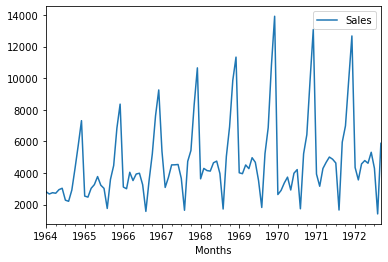

In [27]:
df.plot()

In [28]:
# Testing for Stationarity
from statsmodels.tsa.stattools import adfuller

In [30]:
test_result = adfuller(df['Sales'])

In [31]:
# H0: It is non-stationary
# H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistics', 'p-value', '#lags used', 'Number of Observations Used']
    for value, label in zip(result, labels):
        print(label+' : '+str(value))
    if result[1] <= 0.05:
        print("Strong evidence against the null hypthesis(H0), reject the null hypothesis. Data has no unit root and is stationary.")
    else:
        print("Weak evidence against null hypothesis, time series has a unit root, indicating it is non-staionary.")

In [32]:
adfuller_test(df['Sales'])

ADF Test Statistics : -1.833593056327624
p-value : 0.36391577166024447
#lags used : 11
Number of Observations Used : 93
Weak evidence against null hypothesis, time series has a unit root, indicating it is non-staionary.


# Differencing

In [33]:
# Since the data is seasonal and the data is mostly repeating itself  after 12 months we can going to shift the data by 12

df['Seasonal First Difference'] = df['Sales'] - df['Sales'].shift(12)

In [36]:
df.head(14)

,Sales,Seasonal First Difference
Months,,
1964-01-01,2815.0,NaN
1964-02-01,2672.0,NaN
1964-03-01,2755.0,NaN
1964-04-01,2721.0,NaN
1964-05-01,2946.0,NaN
1964-06-01,3036.0,NaN
1964-07-01,2282.0,NaN
1964-08-01,2212.0,NaN
1964-09-01,2922.0,NaN


In [37]:
# Again the dickey fuller test. Also dropping all the NA values

adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistics : -7.626619157213164
p-value : 2.060579696813685e-11
#lags used : 0
Number of Observations Used : 92
Strong evidence against the null hypthesis(H0), reject the null hypothesis. Data has no unit root and is stationary.


<AxesSubplot:xlabel='Months'>

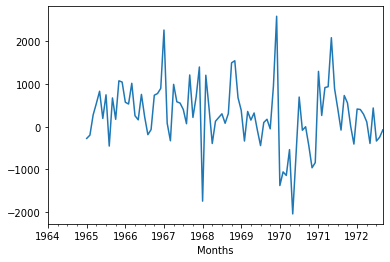

In [38]:
df['Seasonal First Difference'].plot()

# Autoregressive Model

#  Y(t) = C + A1Y(t-1) + A2Y(t-2) + ........ + ApY(t-p) +E(t)

# Final Thoughts on Autocorrelation and Partial Autocorrelation

* Identification of an AR Model is often best done with PACF
    * For an AR Model, the theoritical PACF 'shuts off' past the order of the model. The phrase shut off means that in theory the partial correlations are equal to 0 beyond the point. Put another way, the number of non-zero partial autocorrelation give sthe order of the AR model. By the 'order of the model' we mean the most extreme lag of X that is used as predictor.

* Identification of a MA Model is often best done with ACF
    * For a MA Model, the theoritical PACF does not shut off, but instead tapers towards 0 in the same manner. A cleane pattern for an MA model is ACF. The ACF will have non-zero autocorrelations only at lags involved in the model.
    
    p,d,q
    * p:AR model lags
    * d:differencing
    * q:MA model lags


In [43]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm

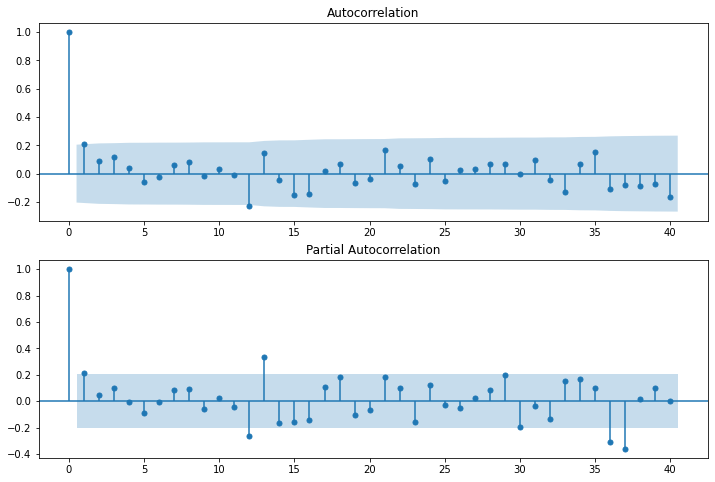

In [50]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference']. iloc[13:], lags=40, ax = ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal First Difference']. iloc[13:], lags=40, ax = ax2)

In [55]:
# Using ARIMA model, however it will not work well as it is a seasonal data. Uisng this just for learning purpose.
# for non-seasonal data
# p=1, d=1, q=1
from statsmodels.tsa.arima_model import ARIMA

In [56]:
model = ARIMA(df['Sales'], order =(1,1,1))
model_fit= model.fit()

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS wi

In [54]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Sales   No. Observations:                  104
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -951.126
Method:                       css-mle   S.D. of innovations           2227.262
Date:                Wed, 08 Dec 2021   AIC                           1910.251
Time:                        12:46:55   BIC                           1920.829
Sample:                    02-01-1964   HQIC                          1914.536
                         - 09-01-1972                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            22.7843     12.405      1.837      0.066      -1.530      47.098
ar.L1.D.Sales     0.4343      0.089      4.866      0.000       0.259       0.609
ma.L1.D.Sales    -1.0000      0.026    -38.503      0.000      -1.051      -0.949
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.3023           +0.0000j            2.3023            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

<AxesSubplot:xlabel='Months'>

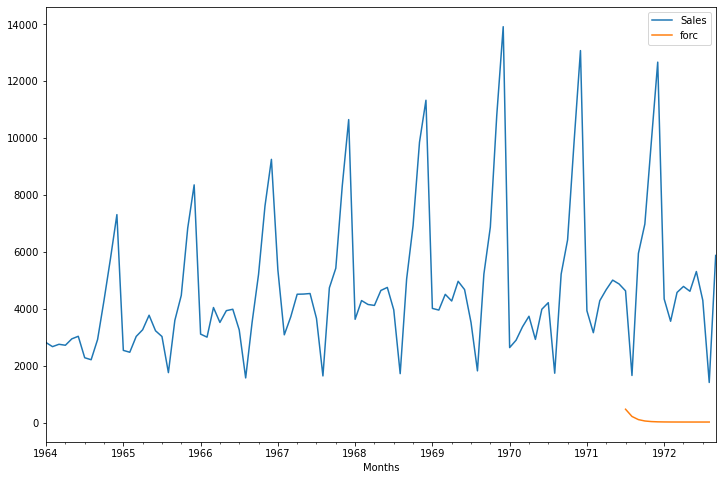

In [58]:
df['forc']= model_fit.predict(start=90, end=103,dynamic =True)
df[['Sales', 'forc']].plot(figsize=(12,8))

In [59]:
model = sm.tsa.statespace.SARIMAX(df['Sales'], order=(1,1,1), seasonal_order=(1,1,1,12))
result=model.fit()

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


<AxesSubplot:xlabel='Months'>

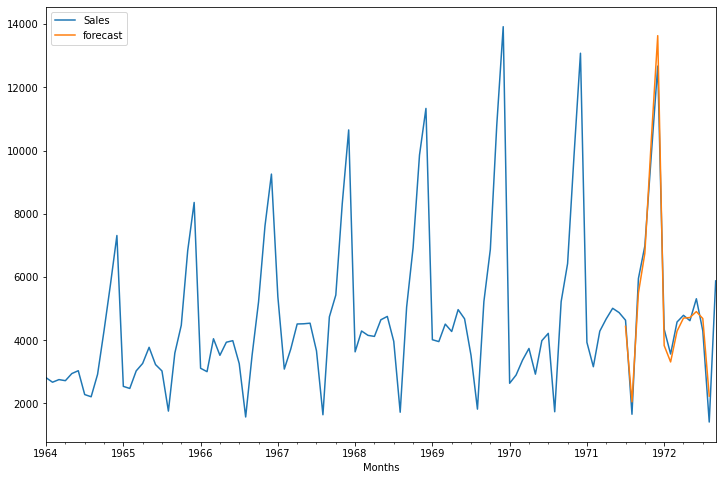

In [61]:
df['forecast']= result.predict(start  =90, end= 103, dynamic =True)
df[['Sales', 'forecast']].plot(figsize=(12,8))

In [69]:
from pandas.tseries.offsets import DateOffset
future_dates= [df.index[-1]+DateOffset(months=x) for x in range(0, 24)]

In [70]:
future_dataset_df = pd.DataFrame(index=future_dates[1:], columns= df.columns)

In [71]:
future_dataset_df.tail()

,Sales,Seasonal First Difference,forc,forecast
1974-04-01,NaN,NaN,NaN,NaN
1974-05-01,NaN,NaN,NaN,NaN
1974-06-01,NaN,NaN,NaN,NaN
1974-07-01,NaN,NaN,NaN,NaN
1974-08-01,NaN,NaN,NaN,NaN


In [74]:
future_df = pd.concat([df,future_dataset_df])

<AxesSubplot:>

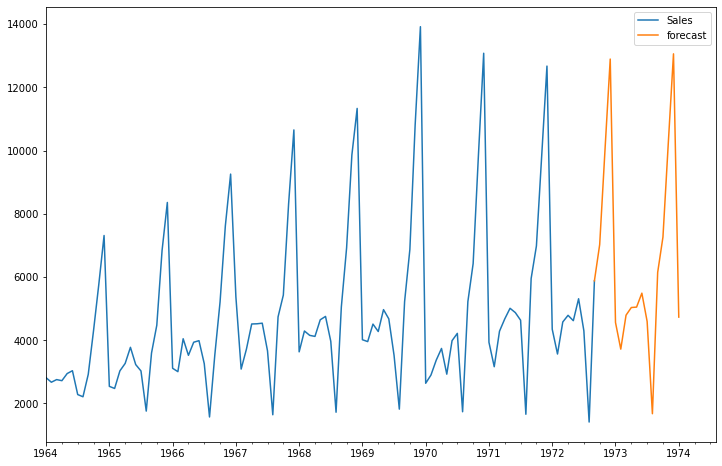

In [78]:
future_df['forecast'] = result.predict(start=104, end =120, dynamic = True)
future_df[['Sales', 'forecast']].plot(figsize=(12,8))